In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from IPython.display import clear_output
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn  import tree 
from sklearn.metrics import accuracy_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
data = pd.read_csv("Accidents0515.csv")
data.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,0,1,1,2,2,0,0,1,1,E01002849
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,0,5,4,1,1,0,0,1,1,E01002909
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,0,0,4,1,1,0,0,1,1,E01002857
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,0,0,1,1,1,0,0,1,1,E01002840
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,0,0,7,1,2,0,0,1,1,E01002863


In [3]:
data.isnull().sum()

Accident_Index                                      0
Location_Easting_OSGR                             138
Location_Northing_OSGR                            138
Longitude                                         138
Latitude                                          138
Police_Force                                        0
Accident_Severity                                   0
Number_of_Vehicles                                  0
Number_of_Casualties                                0
Date                                                0
Day_of_Week                                         0
Time                                              151
Local_Authority_(District)                          0
Local_Authority_(Highway)                           0
1st_Road_Class                                      0
1st_Road_Number                                     0
Road_Type                                           0
Speed_limit                                         0
Junction_Detail             

In [4]:
data.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location'],
      dtype='object')

In [5]:
data.LSOA_of_Accident_Location.head()

0    E01002849
1    E01002909
2    E01002857
3    E01002840
4    E01002863
Name: LSOA_of_Accident_Location, dtype: object

In [6]:
data.Weather_Conditions.head()

0    2
1    1
2    1
3    1
4    1
Name: Weather_Conditions, dtype: int64

#  Data cleaning

In [7]:
data['Latitude']=data['Latitude'].fillna(data['Latitude'].mean())

In [8]:
data['Time']=data['Time'].fillna('N/A')

In [9]:
data['Location_Easting_OSGR']=data['Location_Easting_OSGR'].fillna(data['Location_Easting_OSGR'].mean())

In [10]:
data['Location_Northing_OSGR']=data['Location_Northing_OSGR'].fillna(data['Location_Easting_OSGR'].mean())

In [11]:
data['Longitude']=data['Longitude'].fillna(data['Longitude'].mean())

In [12]:
data=data.drop('LSOA_of_Accident_Location', 1)

In [13]:
data.isnull().sum()

Accident_Index                                 0
Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Time                                           0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
Junction_Detail                                0
Junction_Control                               0
2nd_Road_Class      

In [14]:
data.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,0,0,1,1,2,2,0,0,1,1
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,0,0,5,4,1,1,0,0,1,1
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,0,0,0,4,1,1,0,0,1,1
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,0,0,0,1,1,1,0,0,1,1
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,0,0,0,7,1,2,0,0,1,1


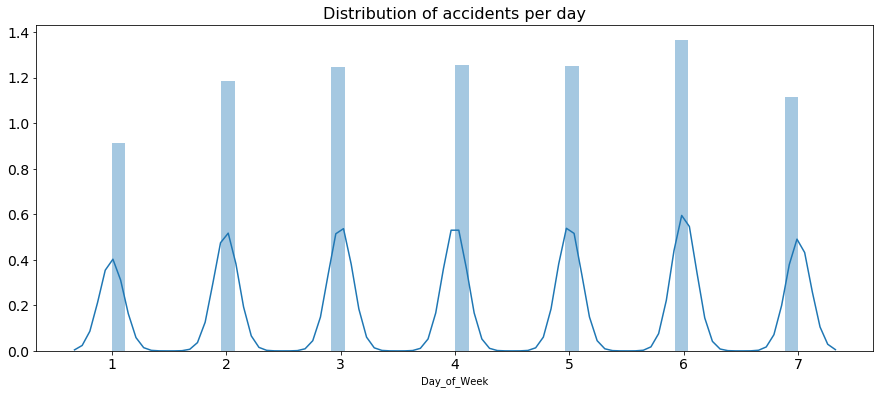

In [15]:
plt.figure(figsize=(15,6))
plt.title('Distribution of accidents per day', fontsize=16)
plt.tick_params(labelsize=14)
sns.distplot(data['Day_of_Week']);

friday akther nhar laabed taaml fih accidonet


In [16]:
data['convert_to_date'] = pd.to_datetime(data['Date'])

In [17]:
data['Day'] = data['convert_to_date'].dt.day
data['Month'] =data['convert_to_date'].dt.month
data['Year'] = data['convert_to_date'].dt.year

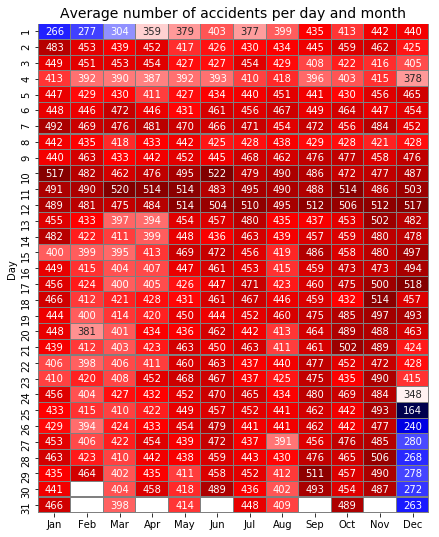

In [18]:
accidents_pivot_table = data.pivot_table(values='Date', index='Day', columns='Month', aggfunc=len)
accidents_pivot_table_date_count = data.pivot_table(values='Date', index='Day', columns='Month', aggfunc=lambda x: len(x.unique()))
accidents_average = accidents_pivot_table/accidents_pivot_table_date_count
accidents_average.columns = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

plt.figure(figsize=(7,9))
plt.title('Average number of accidents per day and month', fontsize=14)
sns.heatmap(accidents_average.round(), cmap='seismic', linecolor='grey',linewidths=0.1, cbar=False, annot=True, fmt=".0f")

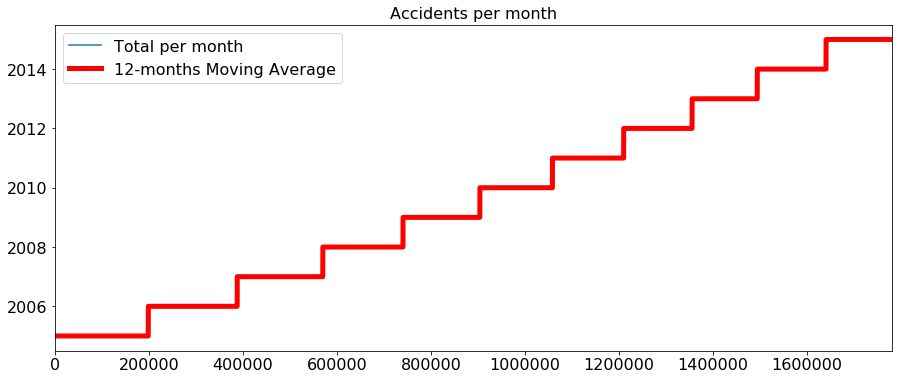

In [19]:
plt.figure(figsize=(15,6))
data['Year'].plot(label='Total per month')
data['Year'].rolling(window=12).mean().plot(color='red', linewidth=5, label='12-months Moving Average')

plt.title('Accidents per month', fontsize=16)
plt.xlabel('')
plt.legend(prop={'size':16})
plt.tick_params(labelsize=16)

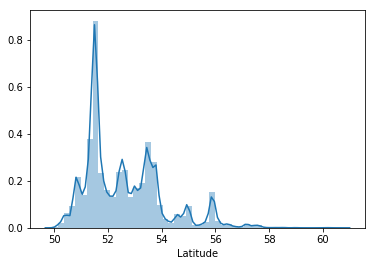

In [20]:
sns.distplot(data['Latitude']);

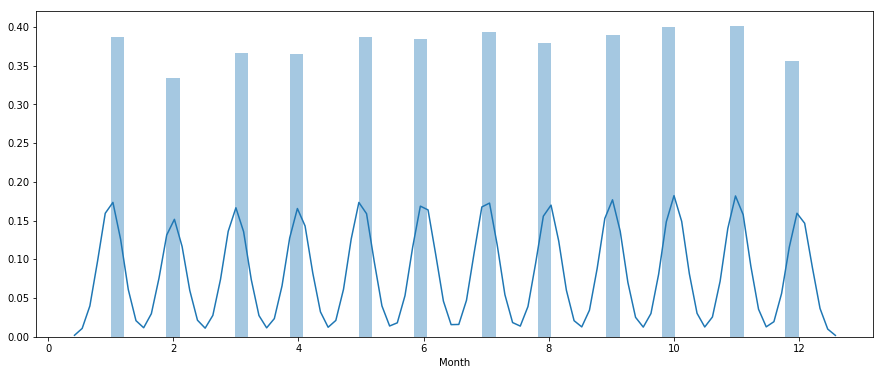

In [21]:
plt.figure(figsize=(15,6))
sns.distplot(data['Month']);

In [25]:
X = data[[ 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force',
       'Number_of_Vehicles', 'Day_of_Week',
        'Local_Authority_(District)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident','Month','Year','Day','Number_of_Casualties']]
y = data[ 'Accident_Severity']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.2 , random_state=60)

In [32]:
classifierr = KNeighborsClassifier(n_neighbors=8)
classifierr.fit(X_train, y_train)
print ('accuracy = { :.3f}',format(classifierr.score(X_test,y_test)))

accuracy = { :.3f} 0.8375204629757027


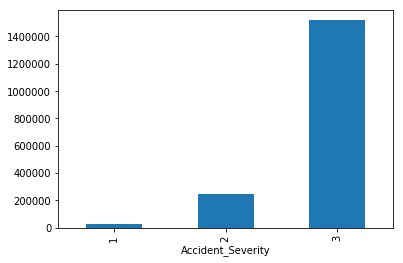

In [26]:
count= data.groupby(data.Accident_Severity).Accident_Severity.count().plot(kind = 'bar')

1  Fatal
2  Serious
3  Slight

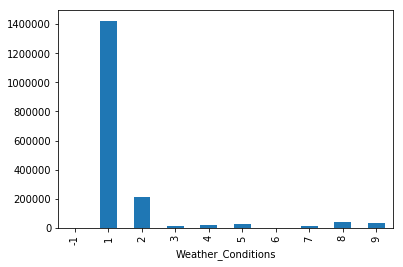

In [27]:
count2= data.groupby(data.Weather_Conditions).Weather_Conditions.count().plot(kind = 'bar')

In [28]:
corrmat = data.corr()

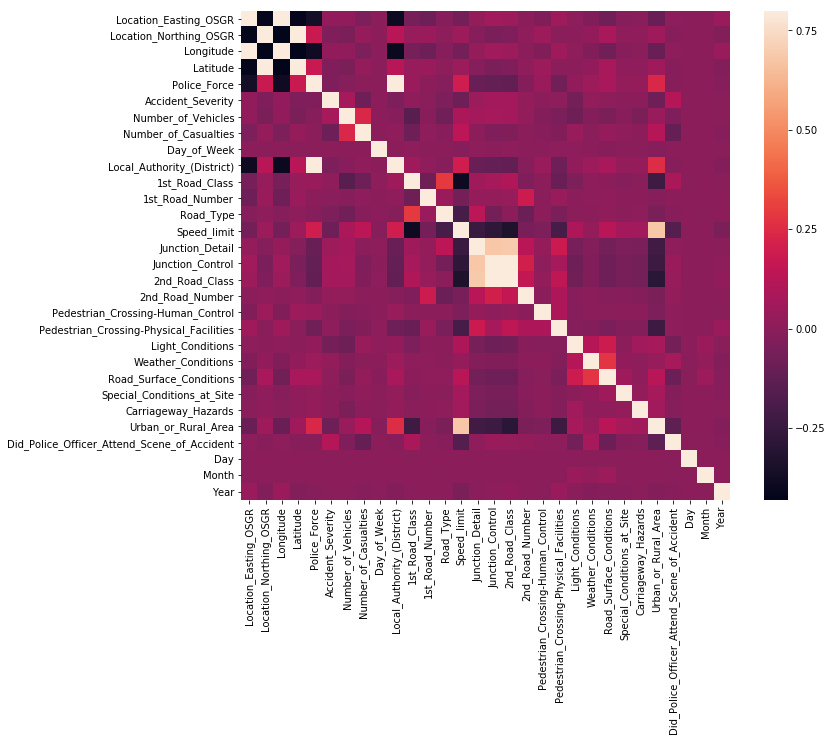

In [29]:
f,ax = plt.subplots(figsize = (12,9))
sns.heatmap(corrmat,vmax =.8,square = True);